# Big Data

This notebook is made for the couse Big Data Processes (Spring 2023), it includes Cleaning, Exploration, Analysis and four different moddeling approches

## Import libraries

In [43]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

## Import dataset

In [44]:
crime_data_full= pd.read_csv('/Users/jonathanpoulsen/Documents/Repos/Big-Data-Project-Crimes-in-Chicargo/Crimes_-_2001_to_Present.csv')

## Data claning

In [45]:
crime_data_full.head()

ID Case Number                    Date                  Block  IUCR  \
0  13006712    JG181347  03/10/2023 11:57:00 PM        001XX W LAKE ST  143A   
1  13007287    JG182176  03/10/2023 11:50:00 PM        036XX S IRON ST  0820   
2  13011659    JG181327  03/10/2023 11:50:00 PM    037XX N ASHLAND AVE  0560   
3  13006710    JG181316  03/10/2023 11:46:00 PM        008XX E 93RD ST  143A   
4  13006789    JG181313  03/10/2023 11:40:00 PM  100XX S LAFAYETTE AVE  2826   

        Primary Type                     Description  \
0  WEAPONS VIOLATION   UNLAWFUL POSSESSION - HANDGUN   
1              THEFT                  $500 AND UNDER   
2            ASSAULT                          SIMPLE   
3  WEAPONS VIOLATION   UNLAWFUL POSSESSION - HANDGUN   
4      OTHER OFFENSE  HARASSMENT BY ELECTRONIC MEANS   

           Location Description  Arrest  Domestic  ...  Longitude  \
0                  CTA PLATFORM    True     False  ... -87.631712   
1  COMMERCIAL / BUSINESS OFFICE   False     False  ... -87.659316   
2                      SIDEWALK   False     False  ...        NaN   
3                      SIDEWALK    True     False  ... -87.603908   
4                     RESIDENCE   False      True  ... -87.624833   

                        Location  Historical Wards 2003-2015  Zip Codes  \
0  (41.885741029, -87.631711749)                        22.0    14309.0   
1  (41.828194666, -87.659315849)                        26.0    14924.0   
2                            NaN                         NaN        NaN   
3  (41.725713691, -87.603907574)                         9.0    21546.0   
4  (41.711933671, -87.624833412)                        30.0    21861.0   

  Community Areas  Census Tracts  Wards  Boundaries - ZIP Codes  \
0            38.0           92.0   36.0                    42.0   
1            56.0          721.0   48.0                    37.0   
2             NaN            NaN    NaN                     NaN   
3            40.0          429.0   35.0                    61.0   
4            45.0          569.0   43.0                    19.0   

  Police Districts  Police Beats  
0             22.0          79.0  
1             23.0         165.0  
2              NaN           NaN  
3             20.0         248.0  
4             10.0         250.0  

[5 rows x 30 columns]

In [46]:
# List of columns to keep
columns_to_keep = ['Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 
                   'Arrest', 'Domestic', 'Community Area', 'FBI Code', 
                   'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']

# Create a new DataFrame with only the columns you want to keep
crime_data_full = crime_data_full[columns_to_keep]


In [47]:
# Check for null values in each column as a percentage of total rows
null_values_percentage = (crime_data_full.isnull().sum() / len(crime_data_full)) * 100

# Print columns with null values
print(null_values_percentage[null_values_percentage > 0])


Location Description    0.131375
Community Area          7.910835
X Coordinate            1.102725
Y Coordinate            1.102725
Latitude                1.102725
Longitude               1.102725
dtype: float64


In [48]:
# Drop rows with any null values
crime_data_full = crime_data_full.dropna()


In [49]:
# Convert columns to 'category' data type
crime_data_full['IUCR'] = crime_data_full['IUCR'].astype('category')
crime_data_full['Community Area'] = crime_data_full['Community Area'].astype('category')
crime_data_full['FBI Code'] = crime_data_full['FBI Code'].astype('category')
crime_data_full['Primary Type'] = crime_data_full['Primary Type'].astype('category')


In [50]:
# Check data types of each column
print(crime_data_full.dtypes)


Date                      object
Block                     object
IUCR                    category
Primary Type            category
Description               object
Location Description      object
Arrest                      bool
Domestic                    bool
Community Area          category
FBI Code                category
X Coordinate             float64
Y Coordinate             float64
Year                       int64
Latitude                 float64
Longitude                float64
dtype: object


In [51]:
# Check for duplicate rows
duplicate_rows = crime_data_full.duplicated()

# Print number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")


Number of duplicate rows: 17562


In [52]:
# Remove duplicate rows
crime_data_full = crime_data_full.drop_duplicates()


In [53]:
# Convert 'Date' column to datetime
crime_data_full['Date'] = pd.to_datetime(crime_data_full['Date'])

# Set 'Date' as the index
crime_data_full.set_index('Date', inplace=True)

# Check index of DataFrame
print(crime_data_full.index)


DatetimeIndex(['2023-03-10 23:57:00', '2023-03-10 23:50:00',
               '2023-03-10 23:46:00', '2023-03-10 23:40:00',
               '2023-03-10 23:38:00', '2023-03-10 23:34:00',
               '2023-03-10 23:30:00', '2023-03-10 23:30:00',
               '2023-03-10 23:30:00', '2023-03-10 23:30:00',
               ...
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Date', length=7041053, freq=None)


In [95]:
# Remove rows corresponding to years 2023, 2001, and 2002
years_to_remove = [2023, 2001, 2002]
crime_data_full = crime_data_full[~crime_data_full.index.year.isin(years_to_remove)]

# Reset the index of the filtered DataFrame
crime_data_filtered.reset_index(inplace=True)

## Exploration

### Number of crimes per offense

In [98]:
arrest_rate = crime_data_full[crime_data_full["Arrest"] == True]

# Group by crime type and count the number of occurrences
grouped = crime_data_full.groupby("Primary Type").size().reset_index(name="Count")

# Sort by count in descending order
sorted = grouped.sort_values("Count", ascending=False)

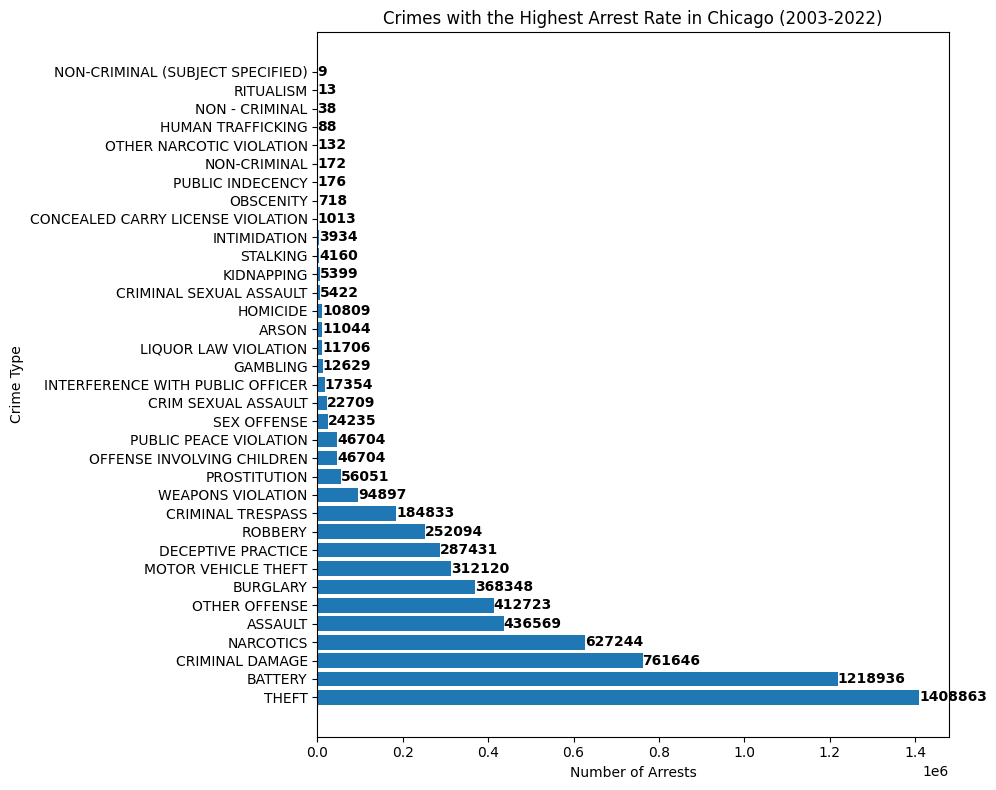

In [99]:
# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(sorted["Primary Type"], sorted["Count"])
ax.set_xlabel("Number of Arrests")
ax.set_ylabel("Crime Type")
ax.set_title("Crimes with the Highest Arrest Rate in Chicago (2003-2022)")

# Add data labels to each column
for i, v in enumerate(sorted["Count"]):
    ax.text(v + 50, i, str(v), color='black', fontweight='bold', fontsize=10, va='center')

plt.tight_layout()
plt.show()

In [100]:
# Calculate the total number of crimes
total_crimes = crime_data_full.shape[0]

# Calculate the number of thefts
num_thefts = crime_data_full[crime_data_full['Primary Type'] == 'THEFT'].shape[0]

# Calculate the number of batteries
num_batteries = crime_data_full[crime_data_full['Primary Type'] == 'BATTERY'].shape[0]

# Calculate the percentages
theft_percentage = (num_thefts / total_crimes) * 100
battery_percentage = (num_batteries / total_crimes) * 100

print(f"Theft makes up {theft_percentage:.2f}% of the total crimes.")
print(f"Battery makes up {battery_percentage:.2f}% of the total crimes.")

# Calculate the combined percentage
combined_percentage = theft_percentage + battery_percentage

print(f"Theft and Battery combined make up {combined_percentage:.2f}% of the total crimes.")

Theft makes up 21.20% of the total crimes.
Battery makes up 18.34% of the total crimes.
Theft and Battery combined make up 39.53% of the total crimes.


### Crimes over year

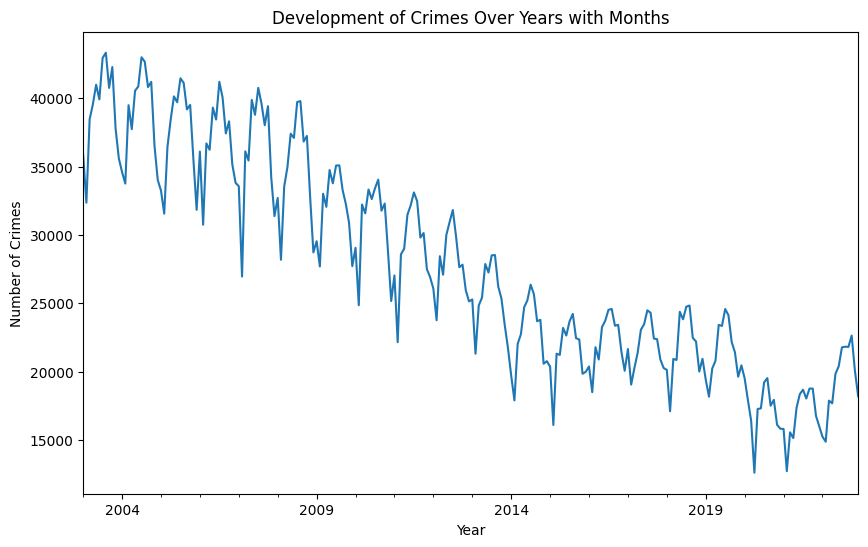

In [105]:
# Resample the data by month and year, counting the number of crimes
crimes_by_month = crime_data_full.resample('M').size()

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the number of crimes over time
crimes_by_month.plot(ax=ax)

# Set the labels and title of the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Crimes')
ax.set_title('Development of Crimes Over Years with Months')

# Show the plot
plt.show()


### Crime over month

/var/folders/gz/m7hcm7_d3q3bv0lwnd3p42dw0000gn/T/ipykernel_47788/1676095712.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(month_names)


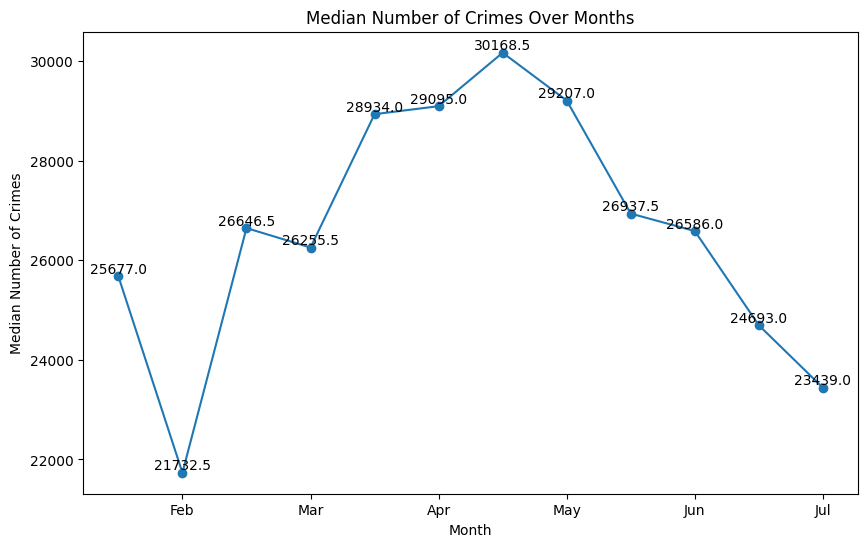

In [108]:
# Resample the data by month and calculate the median number of crimes
median_crimes_by_month = crime_data_full.resample('M').size().groupby(lambda x: x.month).median()

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the median number of crimes over the months
median_crimes_by_month.plot(ax=ax, marker='o')

# Set the labels and title of the plot
ax.set_xlabel('Month')
ax.set_ylabel('Median Number of Crimes')
ax.set_title('Median Number of Crimes Over Months')

# Set the x-axis tick labels to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(month_names)

# Add data labels to each point
for i, crime_count in enumerate(median_crimes_by_month):
    ax.annotate(str(crime_count), xy=(i+1, crime_count), ha='center', va='bottom')

# Show the plot
plt.show()


### Different crimes developmet from 2003 - 2022

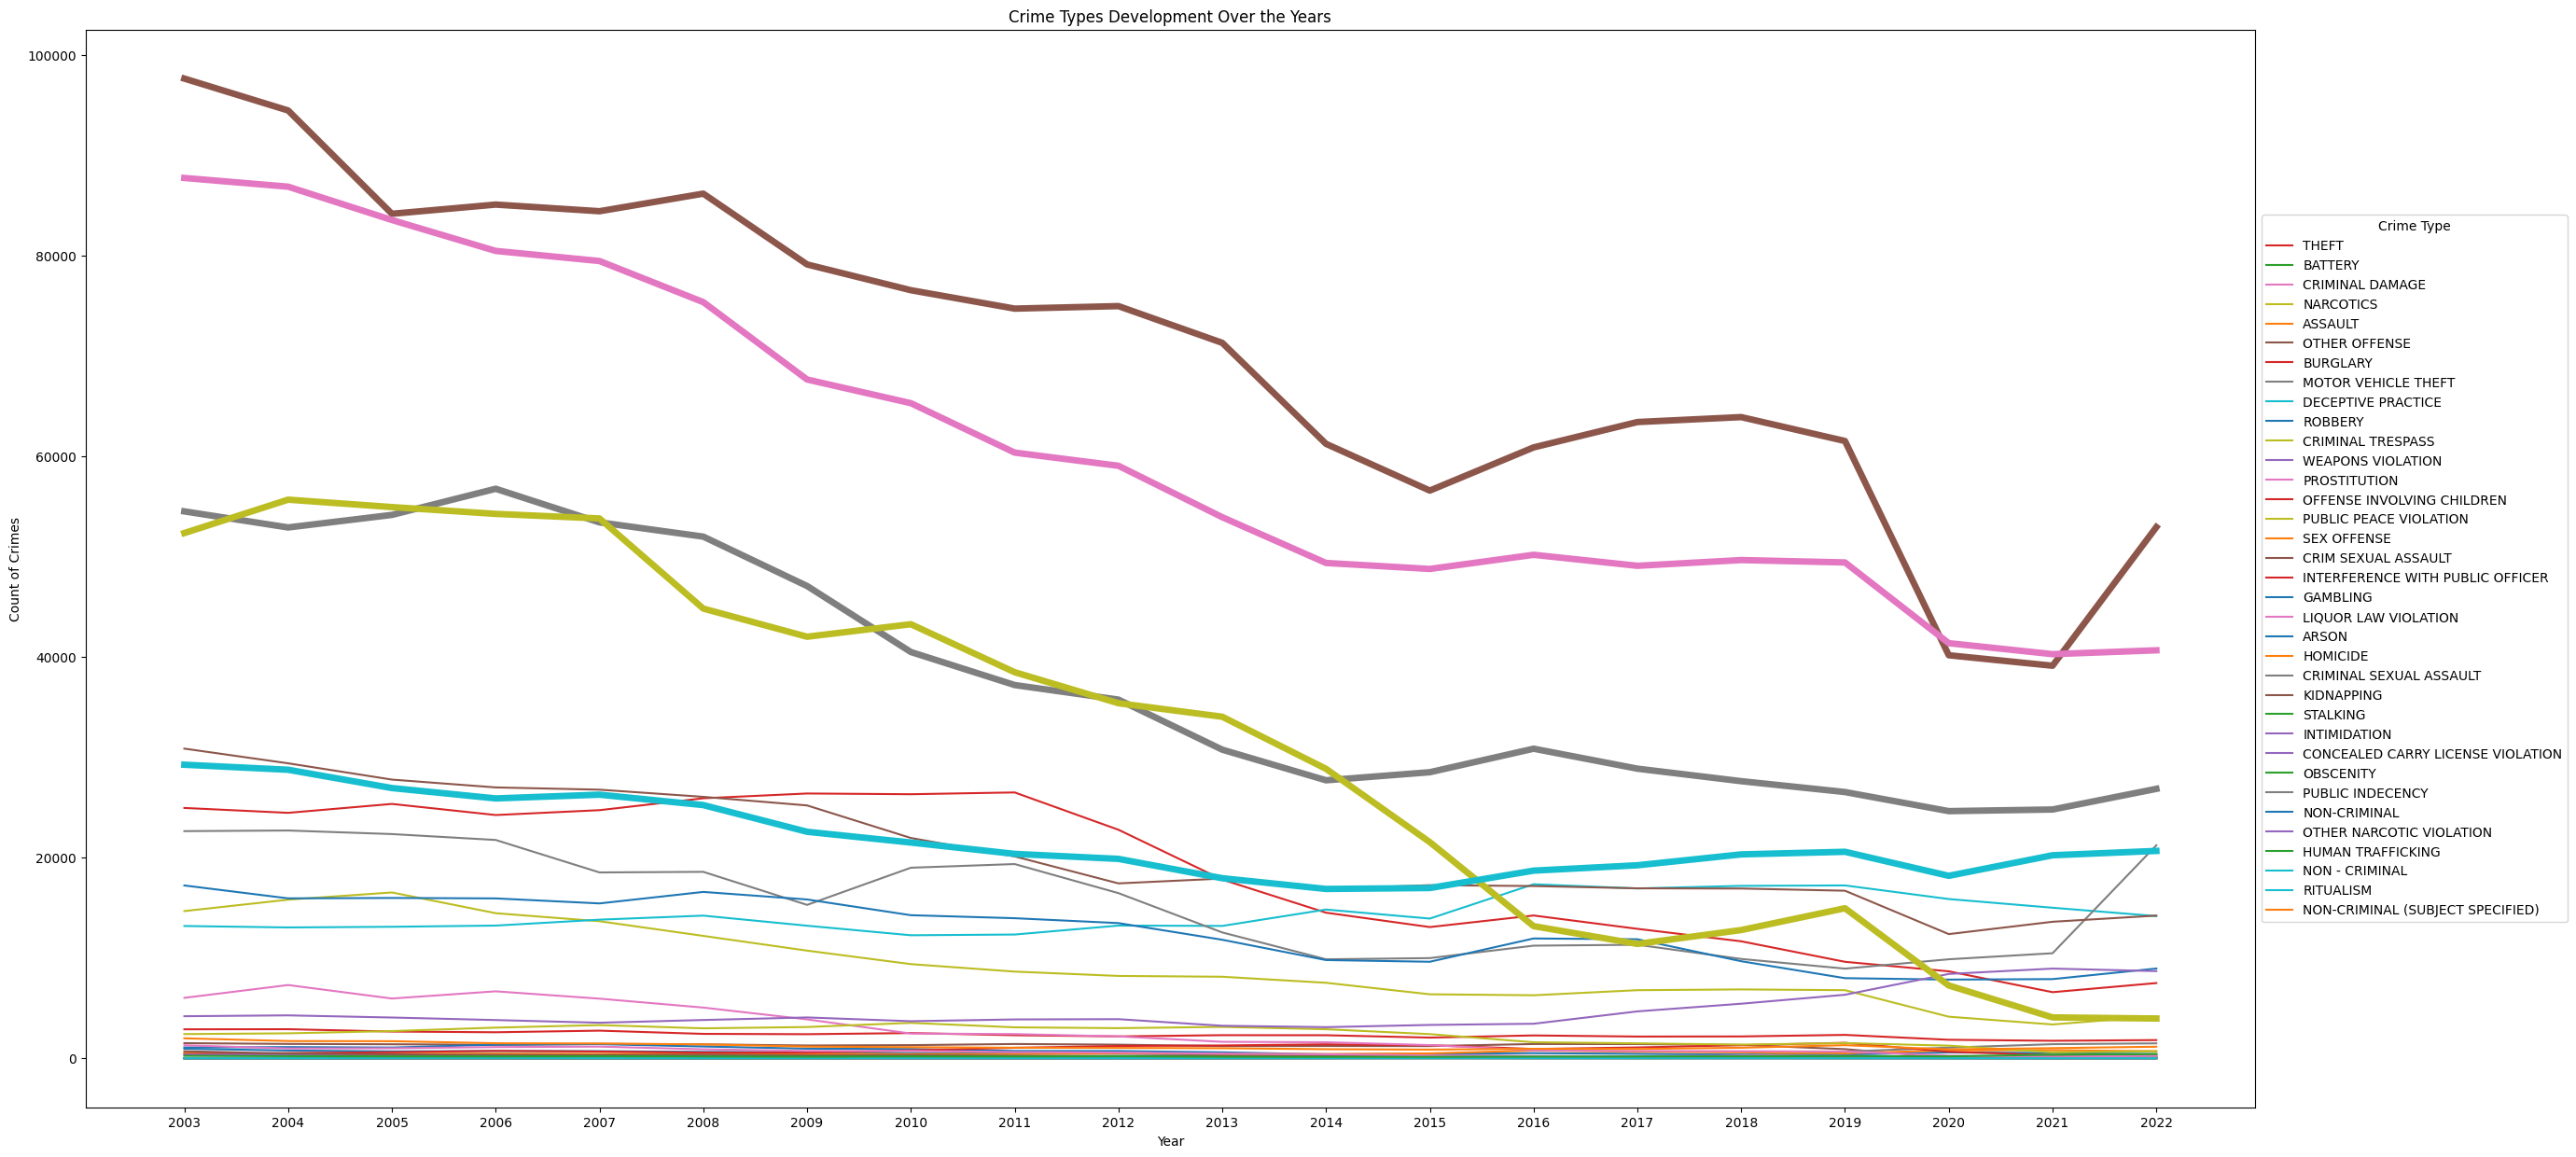

In [123]:
import matplotlib.pyplot as plt

# Group the data by 'Year' and 'Primary Type' and count the number of occurrences of each crime type per year
crime_counts_by_year = crime_data_full.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')

# Pivot the data to have years as rows, crime types as columns, and counts as values
crime_counts_pivot = crime_counts_by_year.pivot(index='Year', columns='Primary Type', values='Count')

# Get the total count of each crime type across the years
crime_type_totals = crime_counts_pivot.sum().sort_values(ascending=False)

# Select the top 5 crime types
top_5_crime_types = crime_type_totals.head(5).index

# Sort the crime types based on the total count
sorted_crime_types = crime_type_totals.index

# Plot the line chart
fig, ax = plt.subplots(figsize=(30, 15))

# Plot all crime types
crime_counts_pivot.plot(ax=ax, kind='line')

# Highlight the top 5 crime types
for crime_type in top_5_crime_types:
    plt.plot(crime_counts_pivot.index, crime_counts_pivot[crime_type], linewidth=5)

# Set the legend on the side, sorted by the total count
handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(crime_type)] for crime_type in sorted_crime_types]
sorted_labels = [label for label in sorted_crime_types]
plt.legend(sorted_handles, sorted_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Crime Type')

# Set the labels and title of the plot
plt.title('Crime Types Development Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Crimes')

# Set the x-axis tick locations and labels
years_to_display = range(2003, 2023)  # Specify the range of years to display
plt.xticks(years_to_display, years_to_display)

plt.show()


### Heatmap of community area

#### Styling

In [19]:
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

#### Geo data

In [35]:
# Import Geo Data
area_geo = r'https://data.cityofchicago.org/resource/igwz-8jzy.geojson'


#### Calculating total number of incidents per district

In [25]:
# Group the crime data by community area and count the number of crimes in each area
disData = crime_data_full.groupby('Community Area').size().reset_index(name='crime_count')

# Print the total number of crimes per community area
print(disData)


   Community Area  crime_count
0             0.0           69
1             1.0       108582
2             2.0        90094
3             3.0       102955
4             4.0        50305
..            ...          ...
73           73.0        84039
74           74.0        15834
75           75.0        56294
76           76.0        41752
77           77.0        70360

[78 rows x 2 columns]


In [38]:
disData

Community Area  crime_count
0             0.0           69
1             1.0       108582
2             2.0        90094
3             3.0       102955
4             4.0        50305
..            ...          ...
73           73.0        84039
74           74.0        15834
75           75.0        56294
76           76.0        41752
77           77.0        70360

[78 rows x 2 columns]

#### Plotting Heatmap

In [36]:
map2 = folium.Map(location=[41.815117282, -87.669999562], zoom_start=11, )#tiles='Mapbox Bright')
map2.choropleth(geo_data = area_geo, 
                data = disData,
                columns = ['Community Area', 'crime_count'],
                key_on = 'feature.properties.area_numbe',
                fill_color = 'Reds', 
                fill_opacity = 0.7, 
                line_opacity = 0.2,
                #threshold_scale=myscale,
                highlight=True,
                legend_name = 'Number of incidents per Community Area',
               )


feature = folium.features.GeoJson(
        district_geo,
        style_function=style_function,
        control=False,
        highlight_function=highlight_function,
        tooltip=folium.features.GeoJsonTooltip(
            fields=[
                'area_numbe',
                'community',
            ],
            aliases=[
                "Area Number: ",
                "Area Label: ",
            ],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
            )
        )

        
map2.add_child(feature)
map2.keep_in_front(feature)

map2

/Users/jonathanpoulsen/Library/Python/3.9/lib/python/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Analysis

In [54]:
# List of columns to keep
columns_to_keep = ['Primary Type', 'Domestic', 'Community Area', 'Year', 'Arrest']

# Create a new DataFrame with only the columns you want to keep
crime_data_simplified = crime_data_full[columns_to_keep]


In [55]:
# Create dummy variables for 'Primary Type', 'Arrest', and 'Domestic'
crime_data_simplified = pd.get_dummies(crime_data_simplified, columns=['Primary Type', 'Arrest', 'Domestic'])


In [56]:
# Set target variable
y = crime_data_simplified['Arrest_True']

# Set feature variables
X = crime_data_simplified[['Community Area', 'Year', 'Domestic_True', 'Domestic_False', 
                           'Primary Type_THEFT', 'Primary Type_BATTERY', 
                           'Primary Type_CRIMINAL DAMAGE', 'Primary Type_NARCOTICS',
                           'Primary Type_ASSAULT', 'Primary Type_DECEPTIVE PRACTICE', 
                           'Primary Type_OTHER OFFENSE', 'Primary Type_BURGLARY', 
                           'Primary Type_MOTOR VEHICLE THEFT', 'Primary Type_ROBBERY']]


In [57]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [16]:
# Calculate correlation of all variables with 'Arrest_True'
correlation = crime_data_simplified.corr()['Arrest_True'].sort_values()

# Print correlation
print(correlation)


/var/folders/gz/m7hcm7_d3q3bv0lwnd3p42dw0000gn/T/ipykernel_12800/2381974691.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = crime_data_simplified.corr()['Arrest_True'].sort_values()


Arrest_False                                     -1.000000
Primary Type_THEFT                               -0.176988
Primary Type_CRIMINAL DAMAGE                     -0.158152
Primary Type_BURGLARY                            -0.111609
Year                                             -0.103930
Primary Type_MOTOR VEHICLE THEFT                 -0.092117
Primary Type_ROBBERY                             -0.075122
Domestic_True                                    -0.065591
Primary Type_DECEPTIVE PRACTICE                  -0.060967
Primary Type_OTHER OFFENSE                       -0.048711
Primary Type_BATTERY                             -0.041754
Primary Type_ASSAULT                             -0.028435
Primary Type_CRIM SEXUAL ASSAULT                 -0.014533
Primary Type_OFFENSE INVOLVING CHILDREN          -0.013400
Primary Type_ARSON                               -0.013014
Primary Type_CRIMINAL SEXUAL ASSAULT             -0.012356
Primary Type_KIDNAPPING                          -0.0103

/var/folders/gz/m7hcm7_d3q3bv0lwnd3p42dw0000gn/T/ipykernel_12800/1674873130.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = crime_data_simplified.corr()


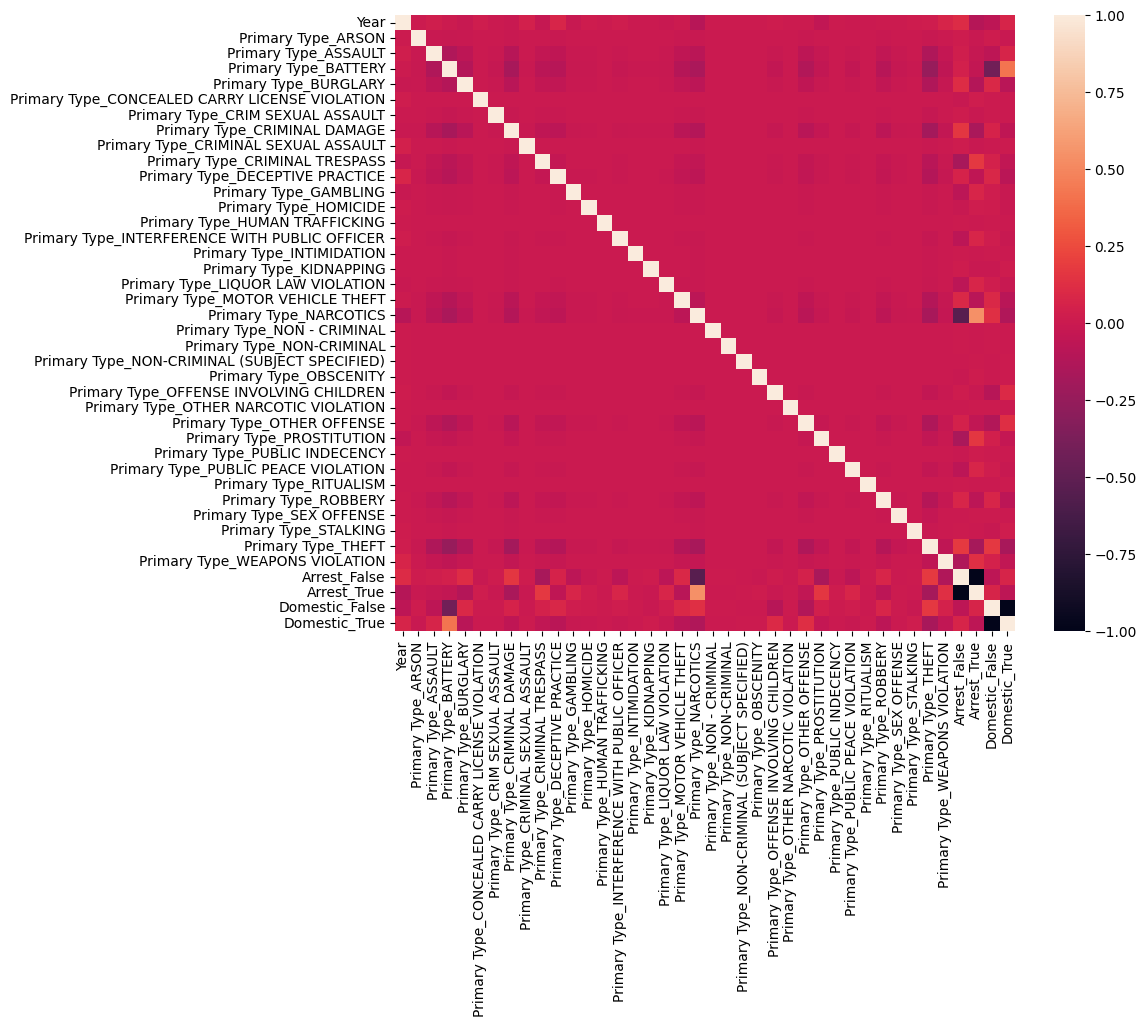

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = crime_data_simplified.corr()

# Create a heatmap
plt.figure(figsize=(10,8))  # Optional: You can set the figure size
sns.heatmap(corr_matrix)

plt.show()


In [58]:
# List of columns to keep
columns_to_keep = ['Arrest_True', 'Arrest_False', 'Community Area', 'Year', 'Domestic_True', 'Domestic_False', 
                   'Primary Type_THEFT', 'Primary Type_BATTERY', 'Primary Type_NARCOTICS', 'Primary Type_CRIMINAL DAMAGE']

# Create a new DataFrame with only the columns you want to keep
crime_data_narrowed = crime_data_simplified[columns_to_keep]


In [20]:
# Calculate correlation of all variables with 'Arrest_True'
correlation = crime_data_narrowed.corr()['Arrest_True'].sort_values()

# Print correlation
print(correlation)


/var/folders/gz/m7hcm7_d3q3bv0lwnd3p42dw0000gn/T/ipykernel_12800/3794449302.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = crime_data_narrowed.corr()['Arrest_True'].sort_values()


Arrest_False                   -1.000000
Primary Type_THEFT             -0.176988
Primary Type_CRIMINAL DAMAGE   -0.158152
Year                           -0.103930
Domestic_True                  -0.065591
Primary Type_BATTERY           -0.041754
Domestic_False                  0.065591
Primary Type_NARCOTICS          0.540639
Arrest_True                     1.000000
Name: Arrest_True, dtype: float64


/var/folders/gz/m7hcm7_d3q3bv0lwnd3p42dw0000gn/T/ipykernel_12800/3231707472.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = crime_data_narrowed.corr()


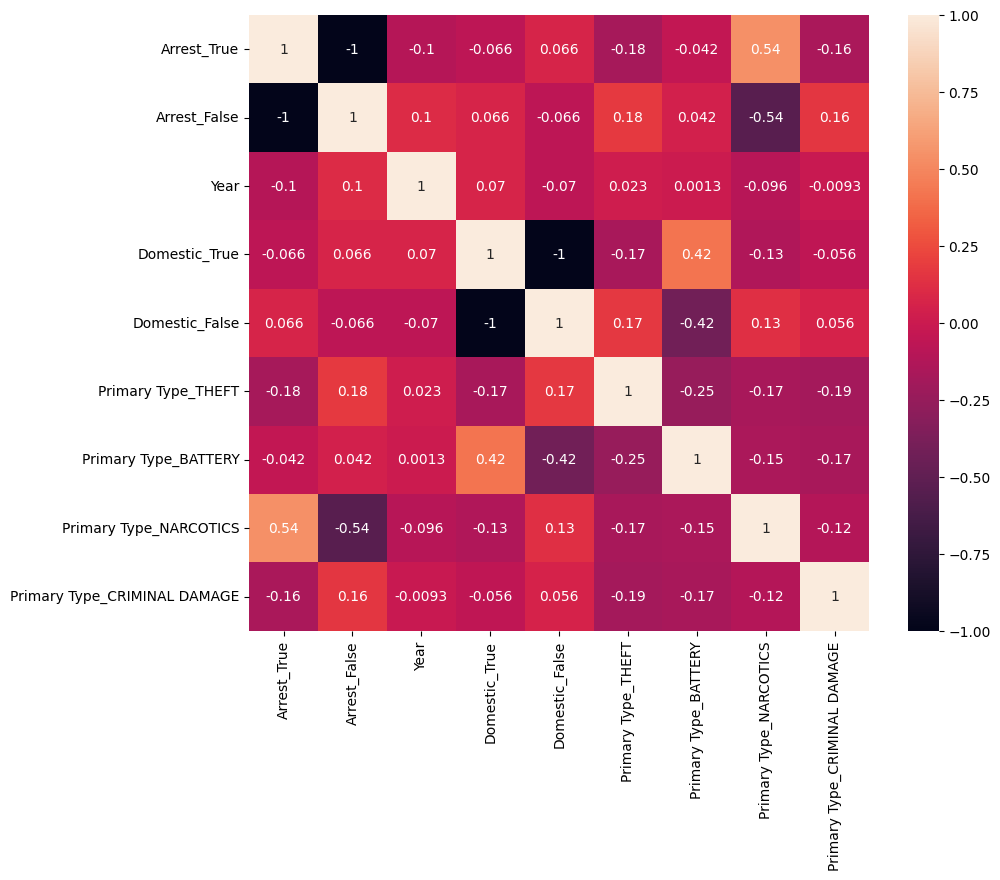

In [21]:
# Calculate correlation matrix
corr_matrix = crime_data_narrowed.corr()

# Create a heatmap
plt.figure(figsize=(10,8))  # Optional: You can set the figure size
sns.heatmap(corr_matrix, annot=True)

plt.show()


## Moddeling

In [22]:
from sklearn.dummy import DummyClassifier

# Create a Dummy Classifier
dummy = DummyClassifier(strategy='most_frequent')

# Fit the model
dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [23]:
# Calculate accuracy on the test data
accuracy = dummy.score(X_test, y_test)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 74.12%


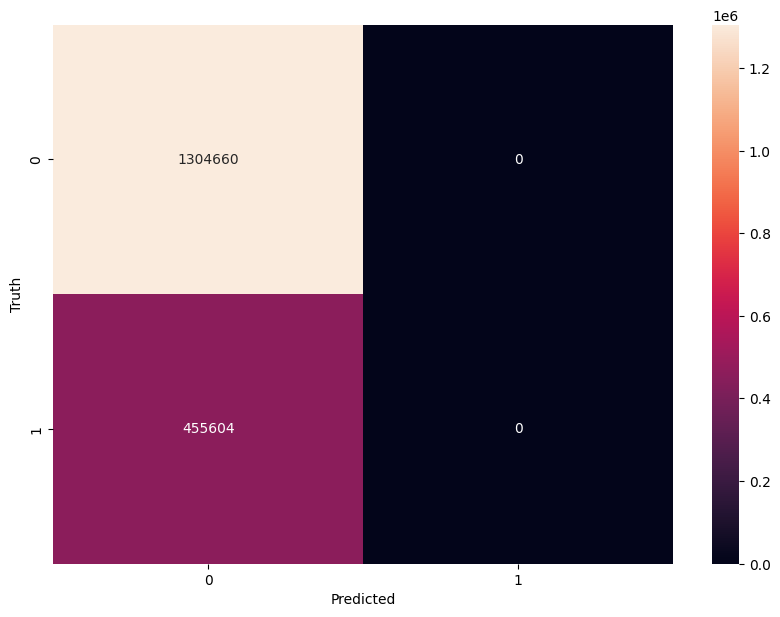

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test data
y_pred = dummy.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()


### Logistic Regression

In [22]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
# Calculate accuracy on the test data
accuracy = logreg.score(X_test, y_test)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 85.62%


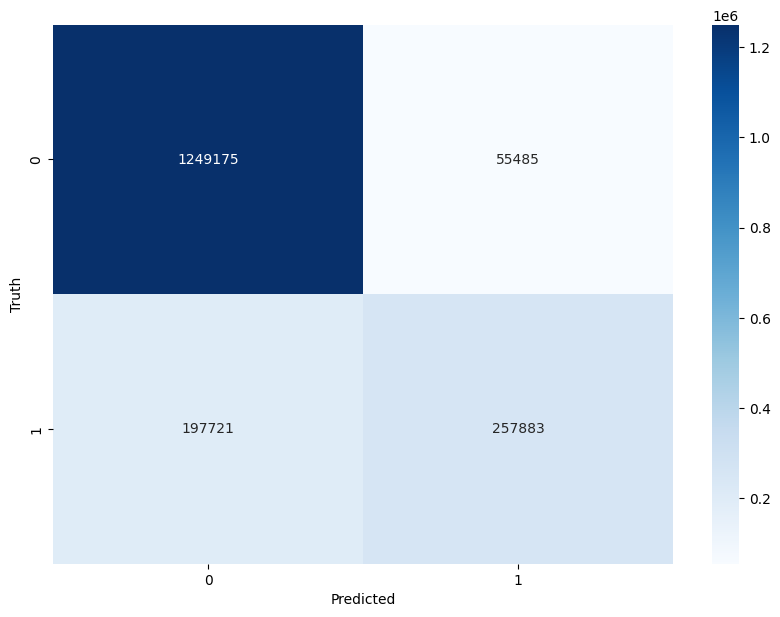

In [24]:
# Predict the test data
y_pred = logreg.predict(X_test)

# Create confusion matrix
cmlogreg = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cmlogreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()


Precision: 0.8229398024048403
Recall (Sensitivity): 0.5660244422788211
F-score: 0.6707214306892839
Specificity: 0.9574716784449588


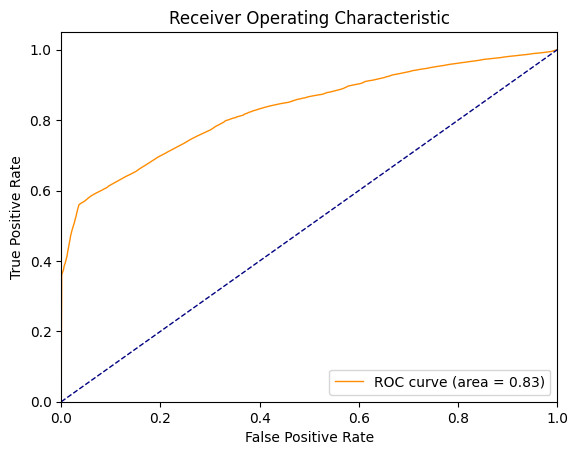

In [26]:
# Predict the test data
y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F-score: {f_score}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print(f"Specificity: {specificity}")

In [27]:
# Calculate accuracy on the training data
train_accuracy = logreg.score(X_train, y_train)

# Calculate accuracy on the test data
test_accuracy = logreg.score(X_test, y_test)

# Print accuracies
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 85.64%
Test Accuracy: 85.62%


#### Tuning of log reg

Using GridSearchCV to find the optimal parameters

In [ ]:
Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

Create a Logistic Regression model
logregv2 = LogisticRegression(max_iter=1000)

Create a GridSearchCV object
grid_search = GridSearchCV(logregv2, param_grid, verbose=2, cv=5, scoring='accuracy')

Fit the model to the data
grid_search.fit(X_train, y_train)

Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [28]:
# Create a Logistic Regression model
logregv3 = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=1000)

# Fit the model
logregv3.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

In [29]:
# Calculate accuracy on the test data
accuracy = logregv3.score(X_test, y_test)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.60%


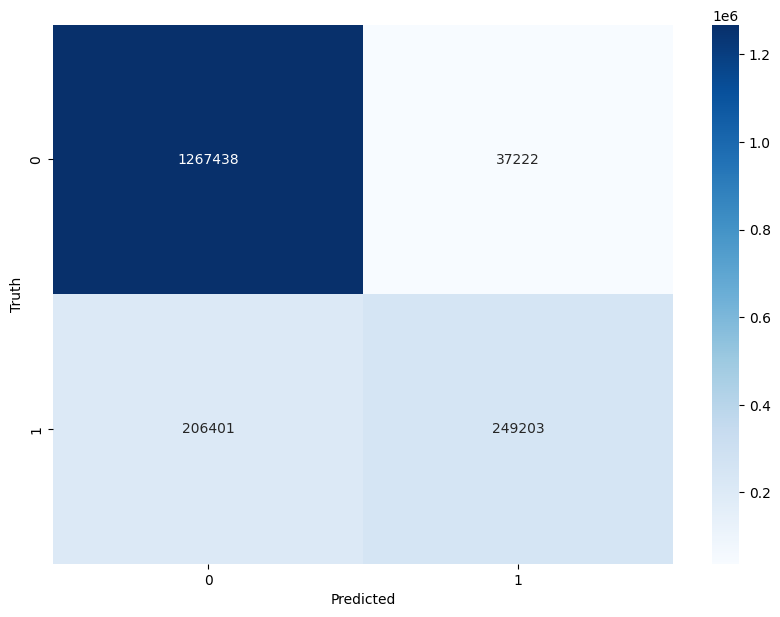

In [47]:
# Predict the test data
y_pred_logistic = logregv3.predict(X_test)

# Create confusion matrix
cmlogregv3 = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cmlogregv3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

Precision: 0.8221729249736249
Recall (Sensitivity): 0.5661736946997832
F-score: 0.6705712766800938
Specificity: 0.9572363680959024


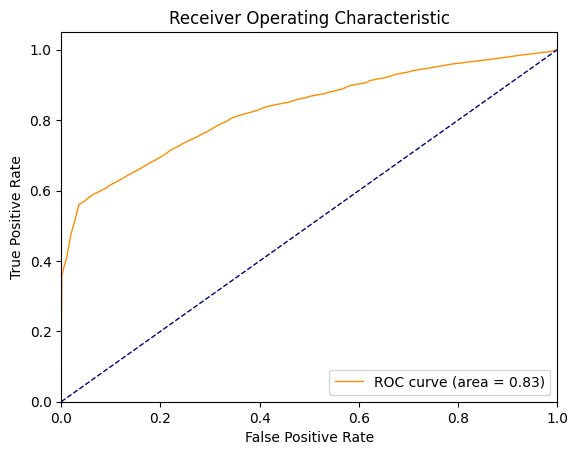

In [32]:
# Predict the test data
y_pred = logregv3.predict(X_test)

# Calculate precision, recall, and F-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F-score: {f_score}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print(f"Specificity: {specificity}")

### Decision Tree Model

In [33]:
# Create a Decision Tree Classifier with Gini criterion
decision_tree = DecisionTreeClassifier(criterion='gini')

# Fit the model
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [34]:
# Calculate accuracy on the test data
accuracy = decision_tree.score(X_test, y_test)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 86.16%


In [52]:
# Predict the test data
y_pred_dt = decision_tree.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1267438   37222]
 [ 206401  249203]]


In [54]:
tn_dt, fp_dt, fn_dt, tp_dt = cm.ravel()

# Calculate false-positive rate (FPR)
fpr_dt = fp_dt / (fp_dt + fp_dt)

# Calculate false-negative rate (FNR)
fnr_dt = fn_dt / (fn_dt + tp_dt)

print(f"False Positive Rate: {fpr_dt:.4f}")
print(f"False Negative Rate: {fnr_dt:.4f}")


False Positive Rate: 0.5000
False Negative Rate: 0.4530


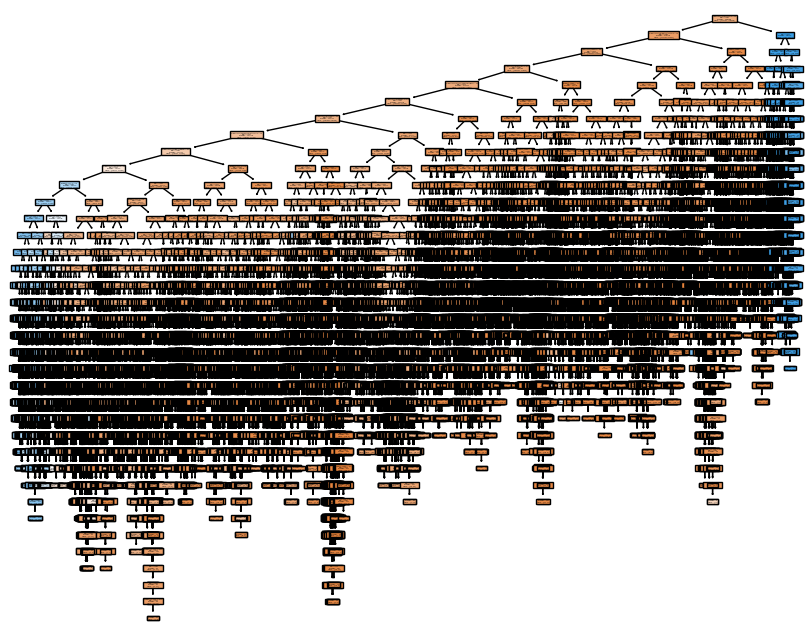

In [37]:
# Plot the pruned decision tree
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns)
plt.show()


#### Prune

In [38]:
# Create a Decision Tree Classifier with limited depth
decision_tree_pruned = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Fit the pruned model
decision_tree_pruned.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

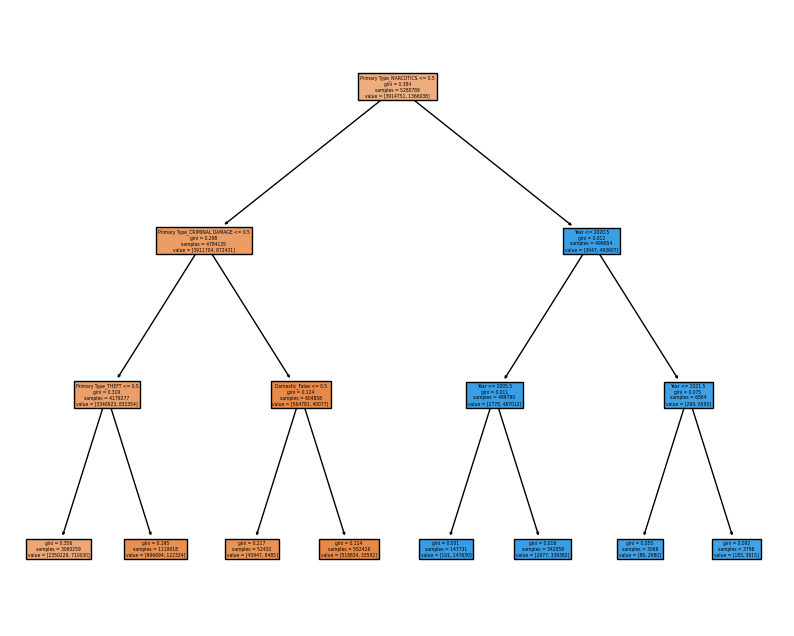

In [39]:
# Plot the pruned decision tree
plt.figure(figsize=(10, 8))
plot_tree(decision_tree_pruned, filled=True, feature_names=X_train.columns)
plt.show()


In [40]:
# Create a dataframe of feature importances
feature_importances = pd.DataFrame(decision_tree_pruned.feature_importances_, index=X_train.columns, columns=['Importance'])

# Sort the feature importances in descending order
sorted_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the top 3 features
top_features = sorted_importances.head(3)
print("Top 3 Features:")
print(top_features)


Top 3 Features:
                              Importance
Primary Type_NARCOTICS          0.931257
Primary Type_THEFT              0.038773
Primary Type_CRIMINAL DAMAGE    0.029333


### Random forrest


In [59]:
# Create a Random Forest Classifier with 100 estimators
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [60]:
# Predict the test data
y_pred_rf = random_forest.predict(X_test)

# Calculate precision, recall, and accuracy
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"Accuracy: {accuracy_rf * 100:.2f}%")


Precision: 0.8692261338739284
Recall: 0.5477278513797069
Accuracy: 86.16%


In [61]:
# Predict the test data
y_pred_rf = random_forest.predict(X_test)

# Create confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix:")
print(cm_rf)


Confusion Matrix:
[[1267116   37544]
 [ 206057  249547]]


In [44]:
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

# Calculate false-positive rate (FPR)
fpr_rf = fp_rf / (fp_rf + tn_rf)

# Calculate false-negative rate (FNR)
fnr_rf = fn_rf / (fn_rf + tp_rf)

print(f"False Positive Rate: {fpr_rf:.4f}")
print(f"False Negative Rate: {fnr_rf:.4f}")


False Positive Rate: 0.0288
False Negative Rate: 0.4523


In [86]:
# Create a Random Forest Classifier with a large number of max features
random_forest_large = RandomForestClassifier(n_estimators=100, max_features=10, random_state=0)

# Fit the model
random_forest_large.fit(X_train, y_train)

# Predict the test data
y_pred_large = random_forest_large.predict(X_test)

# Calculate accuracy
accuracy_large = accuracy_score(y_test, y_pred_large)

print(f"Accuracy with large max features: {accuracy_large * 100:.2f}%")


Accuracy with large max features: 86.16%


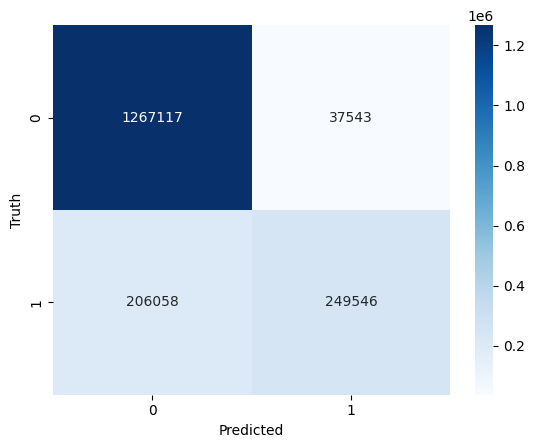

In [87]:
# Calculate the confusion matrix
cmrff = confusion_matrix(y_test, y_pred_large)

# Plot the confusion matrix as a heatmap
sns.heatmap(cmrff, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [55]:
# Calculate accuracy and false positive rate for each model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
fpr_logistic = fp / (fp + tn)

accuracy_decision_tree = accuracy_score(y_test, y_pred_dt)
fpr_decision_tree = fp_dt / (fp_dt + tn_dt)

accuracy_random_forest = accuracy_score(y_test, y_pred_rf)
fpr_random_forest = fp_rf / (fp_rf + tn_rf)

# Write out summarizing information
print("Model Performance Summary:")
print("---------------------------")
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logistic * 100:.2f}%")
print(f"False Positive Rate: {fpr_logistic:.4f}")
print("---------------------------")
print("Decision Tree:")
print(f"Accuracy: {accuracy_decision_tree * 100:.2f}%")
print(f"False Positive Rate: {fpr_decision_tree:.4f}")
print("---------------------------")
print("Random Forest:")
print(f"Accuracy: {accuracy_random_forest * 100:.2f}%")
print(f"False Positive Rate: {fpr_random_forest:.4f}")


Model Performance Summary:
---------------------------
Logistic Regression:
Accuracy: 85.60%
False Positive Rate: 0.0285
---------------------------
Decision Tree:
Accuracy: 86.16%
False Positive Rate: 0.0285
---------------------------
Random Forest:
Accuracy: 86.16%
False Positive Rate: 0.0288


#### Tuning Random forrest


In [68]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
}

In [69]:
# Create the grid search object
grid_search_random = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, verbose=3)

# Perform grid search
grid_search_random.fit(X_train, y_train)

best_params = grid_search_random.best_params_
best_model = grid_search_random.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=5, min_samples_split=2, n_estimators=50;, score=0.834 total time=  46.8s
[CV 2/5] END max_depth=5, min_samples_split=2, n_estimators=50;, score=0.834 total time=  46.5s
[CV 3/5] END max_depth=5, min_samples_split=2, n_estimators=50;, score=0.834 total time=  45.5s
[CV 4/5] END max_depth=5, min_samples_split=2, n_estimators=50;, score=0.834 total time=  44.0s
[CV 5/5] END max_depth=5, min_samples_split=2, n_estimators=50;, score=0.834 total time=  46.0s
[CV 1/5] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.834 total time= 1.6min
[CV 2/5] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.834 total time= 1.5min
[CV 3/5] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.834 total time= 1.5min
[CV 4/5] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.834 total time= 1.4min
[CV 5/5] END max_depth=5, min_samples_split=2, n_estimators=100;, score=

In [70]:
print(best_params)
print(best_model)

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestClassifier(max_depth=5, n_estimators=50, random_state=0)


In [84]:
# Create a Random Forest Classifier with a large number of max features
random_forestv2 = RandomForestClassifier(max_depth=5, n_estimators=50, random_state=0, max_features=10)

# Fit the model
random_forestv2.fit(X_train, y_train)

# Predict the test data
y_predv2 = random_forestv2.predict(X_test)

# Calculate accuracy
accuracy_large = accuracy_score(y_test, y_predv2)

print(f"Accuracy with large max features: {accuracy_large * 100:.2f}%")


Accuracy with large max features: 83.38%


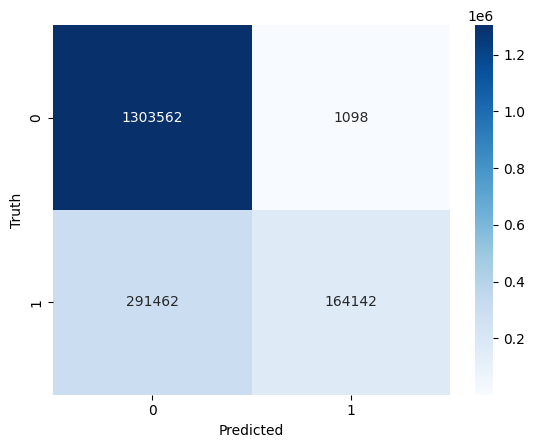

In [85]:
# Calculate the confusion matrix
cmrf = confusion_matrix(y_test, y_predv2)

# Plot the confusion matrix as a heatmap
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

[1303562,1098
291462, 16142]

In [88]:
tn_rfv2, fp_rfv2, fn_rfv2, tp_rfv2 = cmrf.ravel()

# Calculate false-positive rate (FPR)
fpr_rfv2 = fp_rfv2 / (fp_rfv2 + tn_rfv2)

# Calculate false-negative rate (FNR)
fnr_rfv2 = fn_rfv2 / (fn_rfv2 + tp_rfv2)

print(f"False Positive Rate: {fpr_rfv2:.4f}")
print(f"False Negative Rate: {fnr_rfv2:.4f}")

False Positive Rate: 0.0008
False Negative Rate: 0.6397


### KNN

In [72]:
# Create a kNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict the test data
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy of kNN model: {accuracy_knn * 100:.2f}%")


Accuracy of kNN model: 84.11%


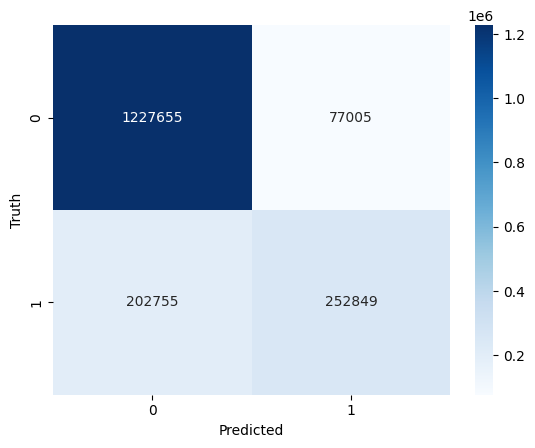

In [76]:
# Calculate the confusion matrix
cmKnn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap
sns.heatmap(cmKnn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


#### Tuning KNN

In [84]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a kNN model
knn = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Evaluate the model
accuracy = best_knn.score(X_test, y_test)
print(f"Accuracy with tuned parameters: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time= 2.4min
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time= 2.4min
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time= 2.5min
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time= 2.4min
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time= 2.4min
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time= 2.3min
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time= 2.3min
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time= 2.3min
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time= 2.3min
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time= 2.4min
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time= 2.5min
[CV] END ...metric=euclidean, n_neighbors=5, wei

In [85]:
print(f"Best parameters: {best_params}")

Best parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [74]:
# Create a kNN model
knnv2 = KNeighborsClassifier(n_neighbors=7, metric= "euclidean", weights="uniform")


Accuracy of kNN model: 84.11%


In [79]:
# Fit the model
knnv2.fit(X_train, y_train)

# Predict the test data
y_pred_knnv2 = knnv2.predict(X_test)

# Calculate accuracy
accuracy_knnv2 = accuracy_score(y_test, y_pred_knnv2)

print(f"Accuracy of kNN model: {accuracy_knnv2 * 100:.2f}%")

Accuracy of kNN model: 84.75%


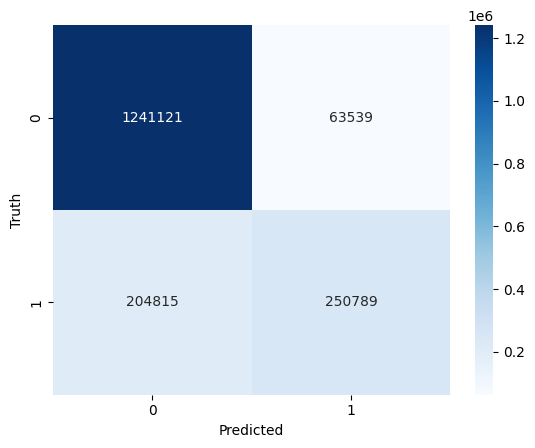

In [81]:
# Calculate the confusion matrix
cmKnn = confusion_matrix(y_test, y_pred_knnv2)

# Plot the confusion matrix as a heatmap
sns.heatmap(cmKnn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()